# Section 1.4 Genomic heritability and GWAS (R)

In [1]:
# Loading data
geno <-read.table("./Hetero_realigned_cov10_filtered3.raw", row.names=1, header=T)
row.names(geno)=1:240
x <- as.matrix(geno)-1   
pheno <- read.csv("./2017heteroPheno.csv", header=T)
attach(pheno)

In [2]:
# Pacakge
library(rrBLUP)
packageVersion("rrBLUP")

[1] '4.6'

## Heritability estimates for H. okamotoi count and body length. ##

In [29]:
A <- A.mat(x, n.core=8)
data <- data.frame(tbcw=sqrt(pheno$bcw+1),length=pheno$length,gid=1:240,x=x)
row.names(A)=1:240;colnames(A)=1:240
ans_bcw <- kin.blup(data,geno="gid", pheno="tbcw",K=A)
ans_length <- kin.blup(data,geno="gid",pheno="length",K = A)
h2_bcw <- ans_bcw$Vg/(ans_bcw$Vg+ans_bcw$Ve)        
h2_length <- ans_length$Vg/(ans_length$Vg+ans_length$Ve)
print(paste("h2_bcw", h2_bcw))
print(paste("h2_length", h2_length))

[1] "h2_bcw 0.646466246472572"
[1] "h2_length 0.843382207016187"


## GWAS for resistance

In [30]:
A=A.mat(x)
lin_map<-read.table("./raw.map")
row.names(A)=1:240;colnames(A)=1:240
g <- data.frame(rownames(lin_map),lin_map$V1, lin_map$V2, t(x))
rownames(g) <-1:nrow(g)
colnames(g) <-c("marker", "chrom", "pos", rownames(x))
# Bonferroni-corrected significance threshold
(thred <- round(-log10(0.05/nrow(g)),3))

[1] 4.895

In [31]:
bcwframe <-data.frame(1:240, sqrt(pheno$bcw+1))
colnames(bcwframe) <-c("gid", "tbcw")
# Performing GWAS 
GWAS_bcw <-GWAS(bcwframe, g,K=A, n.PC = 10) 
# SNP markers with lowest P-values
GWAS_bcw$chrom[head(order(GWAS_bcw$tbcw,decreasing = TRUE),3)]
# Corresponding position (base pair)
GWAS_bcw$pos[head(order(GWAS_bcw$tbcw,decreasing = TRUE),3)]

[1] "GWAS for trait: tbcw"
[1] "Variance components estimated. Testing markers."


[1] 4 9 1

[1]  8994840 12024615 13727873

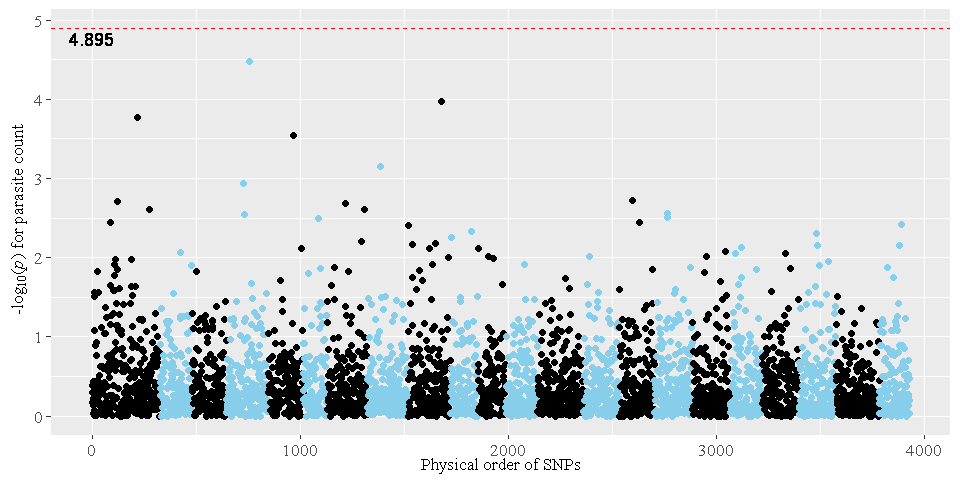

In [32]:
# Manhatan plot
library("ggplot2")
GWAS_bcw$chrom<-as.factor(GWAS_bcw$chrom)
options(repr.plot.width=8, repr.plot.height=4)
my_y_title <- expression(paste("-log"[10],"(", italic("p"), ") for parasite count"))
p1<-ggplot(GWAS_bcw, aes(x=1:3928, y=tbcw, color=chrom))+
    geom_point()+
    scale_color_manual(values = rep(c("black", "skyblue"), 22 ))+
    labs(x="Physical order of SNPs", y=my_y_title)+
    theme(legend.position="none",
          axis.text.y=element_text(size=10),
          axis.text.x=element_text(size=10),
          text=element_text(size=10, 
          family="serif"))+
    geom_hline(yintercept=thred, linetype="dashed", color = "red")+
    geom_text(aes(0,thred,label = thred, vjust = 1.2),color = "black")
p1

## GWAS for length

In [33]:
lengthframe <-data.frame(1:240, length)
colnames(lengthframe) <-c("gid", "length")
# Performing GWAS 
GWAS_length <-GWAS(lengthframe, g,K=A, n.PC = 10) 
# SNP markers with lowest P-values
GWAS_length$chrom[head(order(GWAS_length$length,decreasing = TRUE),3)]
# Corresponding position (base pair)
GWAS_length$pos[head(order(GWAS_length$length,decreasing = TRUE),3)]

[1] "GWAS for trait: length"
[1] "Variance components estimated. Testing markers."


[1]  3 13 12

[1] 9624703  213839 8240650

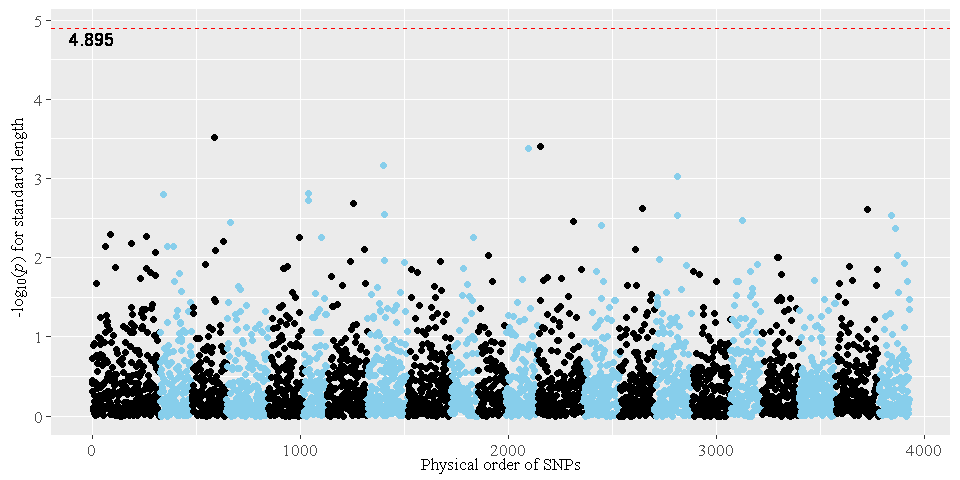

In [36]:
GWAS_length$chrom<-as.factor(GWAS_length$chrom)
options(repr.plot.width=8, repr.plot.height=4)
my_y_title <- expression(paste("-log"[10],"(", italic("p"), ") for standard length"))
p2<-ggplot(GWAS_length, aes(x=1:3928, y=length, color=chrom)) +
  geom_point()+
  scale_color_manual(values = rep(c("black", "skyblue"), 22 )) +
  labs(x="Physical order of SNPs", y=my_y_title)+
  theme(legend.position="none",
        axis.text.y=element_text(size=10),
        axis.text.x=element_text(size=10),
        text=element_text(size=10, 
        family="serif"))+
  geom_hline(yintercept=thred, linetype="dashed", color = "red")+
  geom_text(aes(0,thred,label = thred, vjust = 1.2),color = "black")
p2

In [37]:
# Merge Figs
library("ggpubr")
options(repr.plot.width=8, repr.plot.height=8)
figure <- ggarrange(p1, p2,
                    labels = c("a", "b"),
                    ncol = 1, nrow = 2)
png("1.4.png", width=8, height=8, units="in", res=300)
figure
dev.off()

png 
  2